## Project Overview

As a Machine Learning Engineer, my goal is to develop a predictive model to forecast flight fares on various routes. This model serves a dual purpose: enabling MakeMyTrip to optimize revenue and enhancing customer experience by offering competitive pricing and targeted discounts. By leveraging predictive insights, we can identify customers less likely to book tickets and strategically offer discounts, coupon codes, or other incentives to boost conversions and retain loyalty. 

This project highlights a data-driven approach to fare prediction, involving robust data preprocessing, insightful feature engineering, and sophisticated model building.

## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Dealing with Missing Values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [8]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## We are removing above row in order to remove missing values in `Route` & `Total_Stops`

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Checking Data types

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## Lets perform pre-process & extract derived attribute from `Date_of_Journey`, `Dep_Time`,`Arrival_Time`

In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Change Correct Data Types of Above Mentioned Columns

In [17]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
list_dt = ['Date_of_Journey','Dep_Time','Arrival_Time']
for feature in list_dt:
    change_into_Datetime(feature)

In [21]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### Here `datetime64[ns]` ns stands for nano seconeds

In [22]:
data["Date_of_Journey"].head() #Now this column in standard format

0   2019-03-24
1   2019-01-05
2   2019-09-06
3   2019-12-05
4   2019-01-03
Name: Date_of_Journey, dtype: datetime64[ns]

In [23]:
data["Journry_day"] = data["Date_of_Journey"].dt.day #Access days and store new column

In [24]:
data["Journry_month"] = data["Date_of_Journey"].dt.month

In [25]:
data["Journry_year"] = data["Date_of_Journey"].dt.year

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-08 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-08 05:50:00,2025-01-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


## Lets try to clean `Dep_Time` & `Arrival_Time` then extract derived attributes

In [27]:
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(2)

In [28]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-08 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-08 05:50:00,2025-01-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [29]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-08 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-08 05:50:00,2025-01-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [30]:
cols_to_drop = ["Dep_Time", "Arrival_Time"]

data.drop(cols_to_drop, axis=1, inplace=True)

In [31]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [32]:
data.shape

(10682, 16)

## When will most of the flights take-off

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journry_day',
       'Journry_month', 'Journry_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [34]:
def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Afternoon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20)and (x<=24):
        return "Night"
    
    else:
        return "Late Night"

## Lets apply above function through `.apply()` function

In [35]:
data["Dep_Time_hour"].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4            Afternoon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [36]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

## Lets Visualize the results

<Axes: >

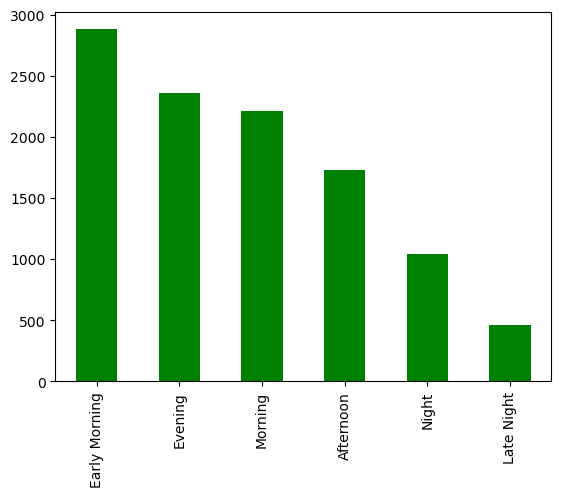

In [37]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind = "bar", color = "g")

In [38]:
# pip install plotly
# pip install chart_studio

In [39]:
#pip install cufflinks

In [40]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

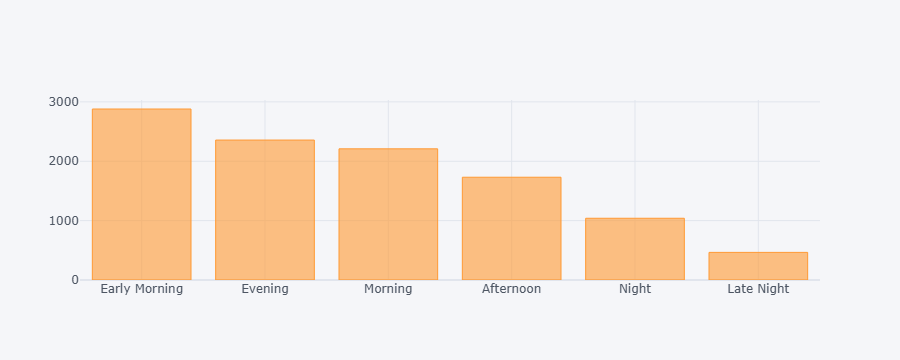

In [41]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind = "bar")

In [42]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


## Lets work with `Duration` feature 

In [43]:
def process_duration(x):
    if 'h' not in x:
        x = '0h' + " " + x
    elif 'm' not in x:
        x = x + " " + '0m'
    
    return x      

In [44]:
data["Duration"] = data["Duration"].apply(process_duration)

In [45]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
data["Duration"][0]

'2h 50m'

In [47]:
'2h 50m'.split(" ")

['2h', '50m']

### Getting `hour` value as integer

In [48]:
'2h 50m'.split(" ")[0] # List indexing

'2h'

In [49]:
'2h 50m'.split(" ")[0][0:-1] # String Indexing

'2'

In [50]:
type('2h 50m'.split(" ")[0][0:-1]) #we commonly work with int in ML models

str

In [51]:
int('2h 50m'.split(" ")[0][0:-1])

2

### Getting `minute` value as integer

In [52]:
int('2h 50m'.split(" ")[1][0:-1])

50

### Apply above technique to `Duration` Column

In [53]:
data["Duration_hours"] = data["Duration"].apply(lambda x: int(x.split(" ")[0][0:-1]))

In [54]:
data["Duration_mins"] = data["Duration"].apply(lambda x: int(x.split(" ")[1][0:-1]))

In [55]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


## Let Analyse wheater `Duration` impacts on price or not

In [56]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [57]:
2*60

120

In [58]:
'2*60'

'2*60'

In [59]:
eval('2*60')

120

In [60]:
data["Duration_total_mins"] = data["Duration"].str.replace("h","*60" ).str.replace(" ", "+").str.replace("m","*1").apply(eval)

In [61]:
data["Duration_total_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [62]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journry_day',
       'Journry_month', 'Journry_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

### Scatter plot

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

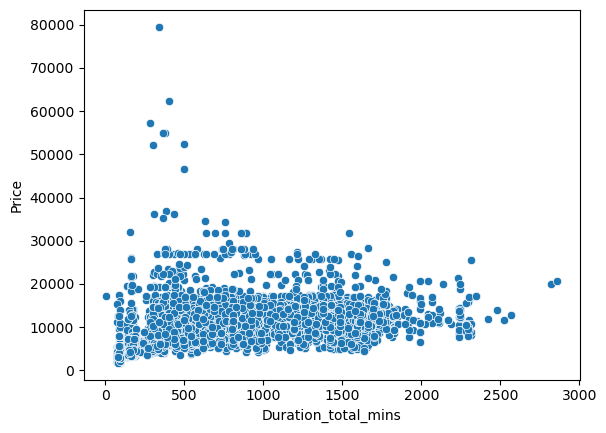

In [63]:
sns.scatterplot(x = "Duration_total_mins", y = "Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

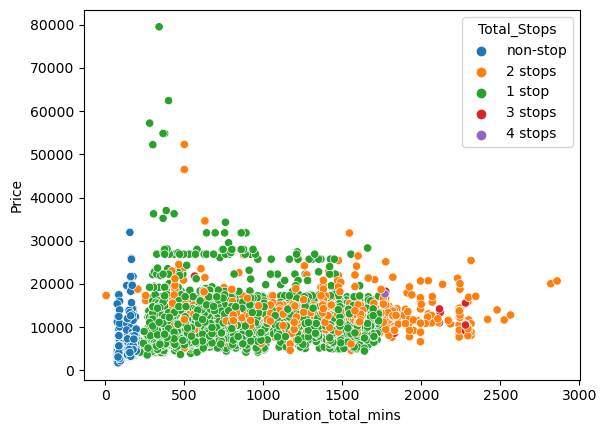

In [64]:
sns.scatterplot(x = "Duration_total_mins", y = "Price", hue="Total_Stops", data=data)

### Insights
* blue points showing non-stop flights take less time while their fare is always low
* as the stop increases, duration also increase and price also increases in some of the case

### Regression plot

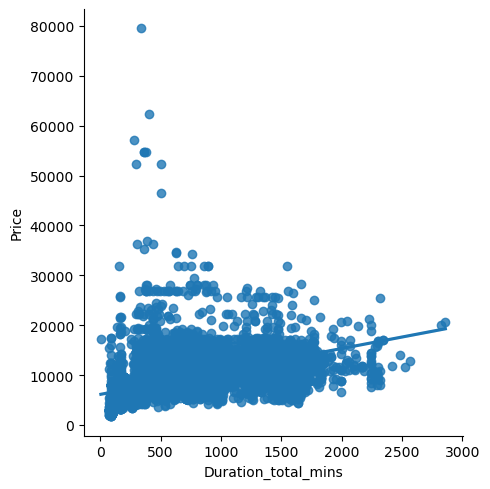

In [65]:
sns.lmplot(x = "Duration_total_mins", y = "Price", data=data)

### Insights
* when duration increases, price will also increase for the most of the point
* For example: if line slope is 0.6(60/100), its mean if duration increase 100 units, price will increase by 60 units

# Problem statement
## 01) On which route `Jet Airways` is extremely used??


### Explore various `Airlines` 

In [66]:
data["Airline"] == "Jet Airways"

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [67]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [68]:
data["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [69]:
data[data["Airline"] == "Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### Insights
* These are top 10 (if needed) routes which i have the most number of flights used by `Jet Airways`.
* `CCU → BOM → BLR` is the route `Jet Airways` is extremely used


## 02) Airline vs Price Analysis

In [70]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journry_day',
       'Journry_month', 'Journry_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

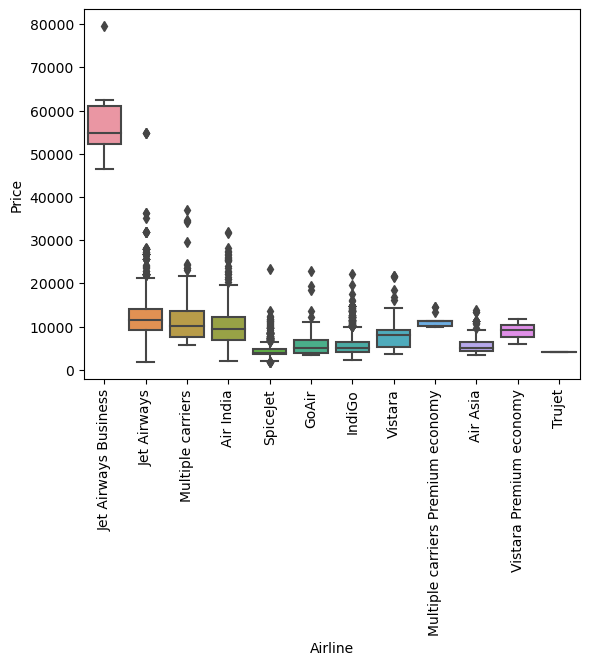

In [71]:
sns.boxplot(x= "Airline", y = "Price", data = data.sort_values("Price",ascending=False ) )
plt.xticks(rotation = "vertical")
plt.show()

## Applying one hot Encoding

* Nominal data dont have any order. for this case most commonly we use `One-Hot Encoding`
* Ordinal Data have some order like Good, Best, better like this. for this case most commonly we use `Label Encoding`

In [72]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,Journry_month,Journry_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


## Extracting Categorical Features

In [73]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

## Extracting Numerical Features

In [74]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [75]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [76]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

### Applying Feature Encoding

In [77]:
data["Source"].apply(lambda x: 1 if x == "Banglore" else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [78]:
for sub_category in data["Source"].unique():
    data["Source_" + sub_category] = data["Source"].apply(lambda x: 1 if x == sub_category else 0)

In [79]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


In [80]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [81]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [82]:
data["Airline"].nunique()

12

* Here we have 12 unique values in Airline features . if we did One hot encoding its create more 12 features or columns in our data set. its would create a issue. curse of dimensionality
*  Here if we have more sub-categories , its better to do more optimized feature encoding

## Lets Perform `Target Column Guided encoding` on Data

In [83]:
data.groupby("Airline")["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [84]:
airlines = data.groupby("Airline")["Price"].mean().sort_values().index

In [85]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [86]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0) }

In [87]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [88]:
data["Airline"] = data["Airline"].map(dict_airlines)

In [89]:
data["Airline"]

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [90]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [91]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [92]:
data["Destination"].replace("New Delhi", "Delhi", inplace=True)

In [93]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [94]:
data.groupby("Destination")["Price"].mean().sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [95]:
dest = data.groupby("Destination")["Price"].mean().sort_values().index

In [96]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [97]:
dict_dest = {key:index for index, key in enumerate(dest, 0) }

In [98]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [99]:
data["Destination"] = data["Destination"].map(dict_dest)

In [100]:
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [101]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


## Perform Manual Encoding - Label Encoding

In [102]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [103]:
data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [104]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [105]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [106]:
data["Total_Stops"] = data["Total_Stops"].map(stop)

In [107]:
data["Total_Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Remove Unnecessary features

In [108]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journry_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [109]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journry_day',
       'Journry_month', 'Journry_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [110]:
data["Additional_Info"].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

its says that 78% data belongs to no infomation. so i can drop this column

In [111]:
data["Journry_year"].unique() #Here is only one unique value. so we can drop

array([2019], dtype=int64)

In [112]:
data.drop(columns=["Date_of_Journey","Additional_Info", "Duration_total_mins","Source", "Journry_year"], axis=1, inplace=True)

In [113]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journry_day', 'Journry_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [114]:
data.head(2)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journry_day,Journry_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [115]:
data.drop(columns=["Duration", "Route"], axis=1, inplace=True)

In [116]:
data.head()

,Airline,Destination,Total_Stops,Price,Journry_day,Journry_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


## Perform Outlier Detection

In [117]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.kdeplot(df[col], ax=ax1)
    sns.boxplot(x = col,data = df, ax=ax2)
    sns.histplot(df[col], ax=ax3)

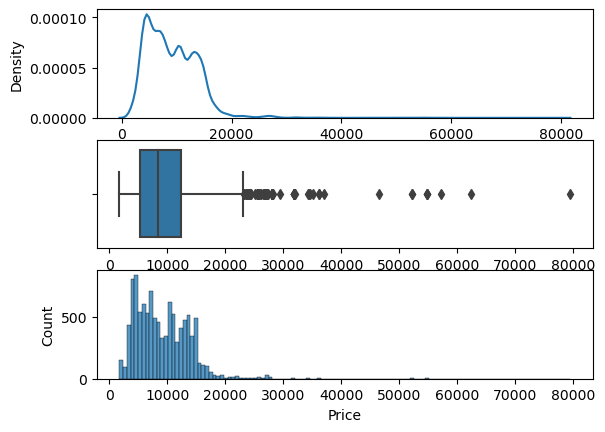

In [118]:
plot(data, "Price")

* If our dataset is skewd, the reason our dataset have outlier. we will use IQR technique to handle outlier.
* Outside of values this ranges treated as outlier values = (Q1 - 1.5* IQR & Q3 + 1.5* IQR)
* Here IQR = 75th Percentile - 25th Percentile
* We can replace this outlier values `Median` of the price. This is the best approach

## Find the Outliers

In [119]:
q1 = data["Price"].quantile(0.25)
q3 = data["Price"].quantile(0.75)
iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [120]:
print(maximum)

23017.0


In [121]:
print(minimum)

-5367.0


* From here our outliers will be considered grater than `23017.0` and less than `-5367.0` price values

In [122]:
outliers = [price for price in data["Price"] if price > maximum or price < minimum]

In [123]:
print(outliers)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [124]:
len(outliers)

94

### Outlier threshold 35000 based on Domain Expert

In [125]:
#Replacing outliers with median value above stated threshold 35000
data["Price"]= np.where(data["Price"] > 35000, data["Price"].median(), data["Price"])

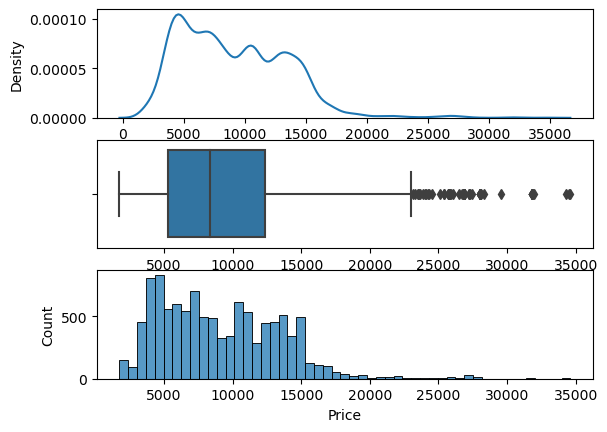

In [126]:
#After replacing outliers with Median
plot(data, "Price")

## Feature Selection

* independent data/ independent features
* Dependent data/ dependent features / Target variable
* Feature Selection is all about we are trying to select best features which have lot to contribute target variable
* Here we use `mutual information(MI)` feature selection approach
* if we pick 2 random variables (2 features in dataset), the MI value is near zero, its mean, this two features completely independent.
* If we have higher value in `MI` close to 1, its mean, these two features, higher dependices.

In [127]:
X = data.drop(["Price"], axis=1)

In [128]:
y = data["Price"]

In [129]:
from sklearn.feature_selection import mutual_info_regression

In [130]:
imp = mutual_info_regression(X,y)

In [131]:
imp

array([0.97541288, 0.9917409 , 0.78912657, 0.19729292, 0.23999   ,
       0.34646011, 0.26099194, 0.39526589, 0.34725087, 0.46870637,
       0.34584123, 0.39043098, 0.4519323 , 0.52067723, 0.13474181,
       0.19483079])

In [132]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [133]:
imp_df

,0
Airline,0.975413
Destination,0.991741
Total_Stops,0.789127
Journry_day,0.197293
Journry_month,0.239990
Dep_Time_hour,0.346460
Dep_Time_minute,0.260992
Arrival_Time_hour,0.395266
Arrival_Time_minute,0.347251
Duration_hours,0.468706


In [134]:
imp_df.columns = ["importance"]

In [135]:
imp_df

,importance
Airline,0.975413
Destination,0.991741
Total_Stops,0.789127
Journry_day,0.197293
Journry_month,0.239990
Dep_Time_hour,0.346460
Dep_Time_minute,0.260992
Arrival_Time_hour,0.395266
Arrival_Time_minute,0.347251
Duration_hours,0.468706


In [136]:
imp_df.sort_values(by = "importance", ascending=False)

,importance
Destination,0.991741
Airline,0.975413
Total_Stops,0.789127
Source_Delhi,0.520677
Duration_hours,0.468706
Source_Kolkata,0.451932
Arrival_Time_hour,0.395266
Source_Banglore,0.390431
Arrival_Time_minute,0.347251
Dep_Time_hour,0.346460


* Since we dont have lot of features here, so here we use all the features for our model building

In [137]:
X

,Airline,Destination,Total_Stops,Journry_day,Journry_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4,9,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,3,1,11,30,14,10,2,40,1,0,0,0,0


## Build ML Model

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rfr = RandomForestRegressor()

In [142]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [143]:
y_pred = rfr.predict(X_test)

In [144]:
y_pred

array([16749.35      ,  6534.89      ,  8978.46      , ...,
        9260.21      ,  9002.07      , 11635.84483333])

## Evaluate the model

In [145]:
from sklearn import metrics

In [146]:
metrics.r2_score(y_test, y_pred)

0.810354747589251

## Save the model

In [147]:
import pickle

In [148]:
file = open(r'C:\Users\User\Documents\shansinghPort/rf_random.pkl','wb')

In [149]:
pickle.dump(rfr,file)

## Load the model

In [150]:
rf_model = open(r'C:\Users\User\Documents\shansinghPort/rf_random.pkl','rb')

In [151]:
rf_regressor = pickle.load(rf_model)

In [152]:
y_pred2 = rf_regressor.predict(X_test)

In [153]:
metrics.r2_score(y_test, y_pred2)

0.810354747589251

## Define Evaluation Metric

In [154]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))**100 

In [155]:
mape(y_test, y_pred)

3.677243619985005e-88

## Automate ML Pipeline

In [156]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [157]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("Training Score: {}".format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print("Predictions are : {}".format(y_prediction))
    print("\n")
    r2_score = metrics.r2_score(y_test, y_prediction)
    print("r2_score : {}".format(r2_score))
    print("MAE : {}".format(metrics.mean_absolute_error(y_test, y_prediction)))
    print("MSE : {}".format(metrics.mean_squared_error(y_test, y_prediction)))
    print("RMSE : {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print("MAPE : {}".format(mape(y_test, y_prediction))) 
    sns.distplot(y_test - y_prediction)

Training Score: 0.9535133482255301
Predictions are : [16768.95        6278.82        8991.45       ...  8937.59
  8993.16       11768.24983333]


r2_score : 0.8109421226281264
MAE : 1186.2955417184362
MSE : 3630614.590683934
RMSE : 1905.4171697252898
MAPE : 3.76662812443971e-88


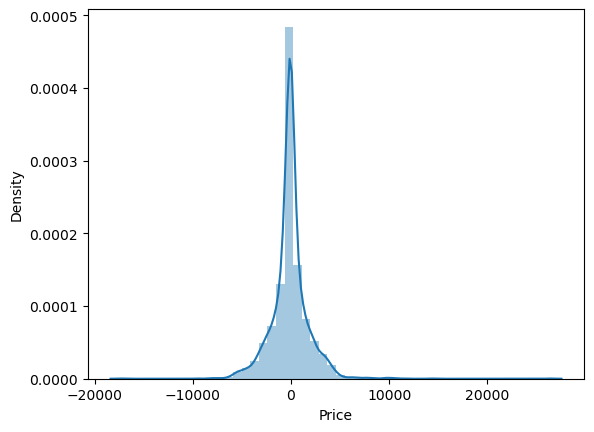

In [158]:
predict(RandomForestRegressor())

In [159]:
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.9698466881450518
Predictions are : [16840.   5135.   8085.  ...  7294.  10141.  11652.5]


r2_score : 0.6987023619239738
MAE : 1390.5781385895255
MSE : 5786035.557702543
RMSE : 2405.417959046316
MAPE : 5.518014975026194e-82


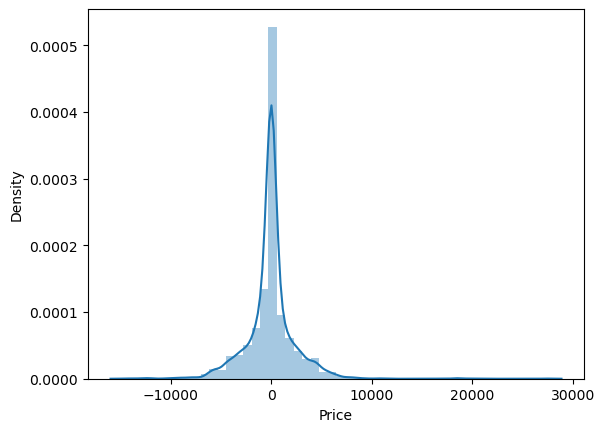

In [160]:
predict(DecisionTreeRegressor())

## Hyperparameter Tuning

In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [162]:
reg_rf = RandomForestRegressor()

In [163]:
np.linspace(start=100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [165]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

min_samples_split = [5, 10, 15, 100]

In [166]:
random_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth": max_depth,
    "min_samples_split":min_samples_split
}

In [167]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [168]:
rf_randomized = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1,verbose=2 )

In [169]:
rf_randomized.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [172]:
rf_randomized.best_params_ #This is providing optimized values for each parameter

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [171]:
rf_randomized.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=5,
                      n_estimators=320)

* If we inilize RF algo this way, this will going to give best score of our model

In [173]:
rf_randomized.best_score_

0.8039881226663516

* We will achive this score if we define our algo with above optimzed parameters values. this r2_score